In [10]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
data = pd.read_csv("ks-projects-201801.csv")

In [15]:
original_data = data.usd_goal_real
min_usd = original_data.min()
max_usd = original_data.max()

scaled_real_goal = (original_data - min_usd)/(max_usd - min_usd)

original_goal_data = data.goal

min_goal_usd = original_goal_data.min()
max_goal_usd = original_goal_data.max()

scaled_goal = (original_goal_data - min_goal_usd)/(max_goal_usd - min_goal_usd)



In [ ]:
fix, ax = plt.subplots(1, 2, figsize=(12, 3))
sns.histplot(scaled_real_goal, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Scaled Real Goal")
sns.histplot(scaled_goal, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Goal")

plt.show()

In [18]:
index_of_positive_pledges = data.usd_pledged_real > 0
positive_pledges = data.usd_pledged_real.loc[index_of_positive_pledges]

normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                              name="usd_pledged_real", index=positive_pledges.index)


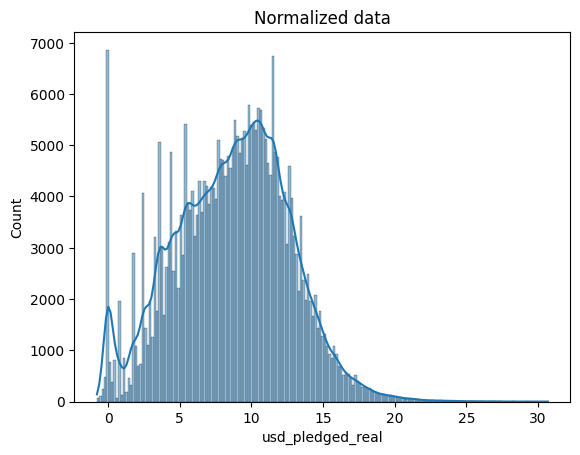

In [19]:
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

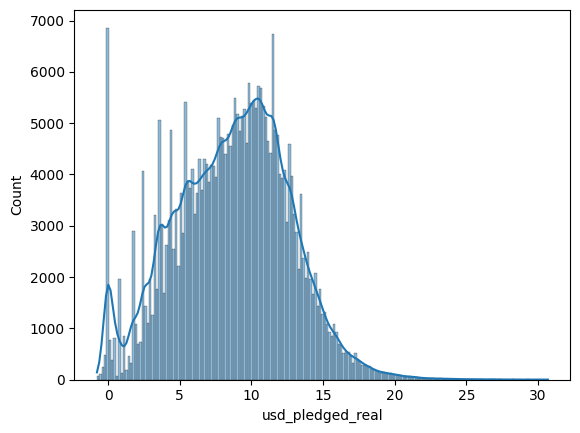

In [22]:
index_of_positive_pledged = data.pledged > 0
pledged = data.pledged.loc[index_of_positive_pledged]

normalized_pledged = pd.Series(stats.boxcox(pledged)[0], name="Pledged", index=pledged.index)
ax = sns.histplot(normalized_pledges, kde=True)
plt.show()